In [113]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [114]:
df = pd.read_csv('../Iris.csv')
df = df.iloc[:, 1:]
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [115]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species']).astype(int)
df = df[df['Species'] != 0]
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


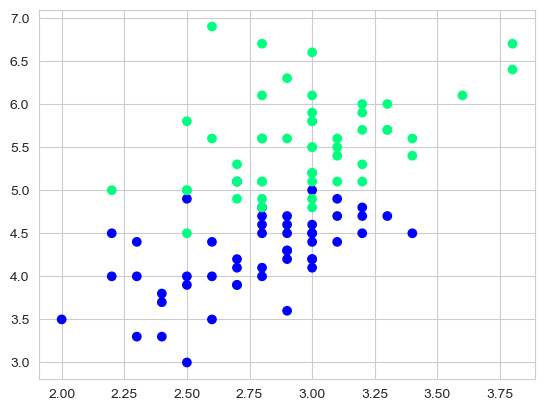

In [116]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [117]:
df.shape

(100, 5)

### split train(10) -> X_train, y_train         {training(8-by sampling)} 
### individual_testing(5) - >X_test,y_test   {individual model testing testing}
###  voting_testing(5)                       {at the time of voting}

In [118]:
# shuffle 
df = df.sample(100)


df_train = df.iloc[:60].sample(10)
individual_testing = df.iloc[60:80].sample(5)
voting_testing = df.iloc[80:].sample(5)

In [119]:
repeating_rows = pd.merge(df_train, individual_testing, how='inner')
repeating_rows = pd.merge(repeating_rows, voting_testing, how='inner')

if not repeating_rows.empty:
    print("Repeating rows found:")
    print(repeating_rows)
else:
    print("No repeating rows found.")

No repeating rows found.


In [120]:
X_individual_testing = individual_testing.iloc[:,:-1].sample(2,axis=1).values
y_individual_testing = individual_testing.iloc[:,-1].values

In [121]:
# Evaluate function

def evaluate(clf, X_train, y_train):
    clf.fit(X_train,y_train)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X_train.values,y_train.values,clf=clf,legend=2)
    y_pred = clf.predict(X_individual_testing)
    print(accuracy_score(y_individual_testing,y_pred))

In [122]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [123]:
df_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
93,5.0,2.3,3.3,1.0,1
121,5.6,2.8,4.9,2.0,2
103,6.3,2.9,5.6,1.8,2
132,6.4,2.8,5.6,2.2,2
133,6.3,2.8,5.1,1.5,2
52,6.9,3.1,4.9,1.5,1
136,6.3,3.4,5.6,2.4,2
111,6.4,2.7,5.3,1.9,2
56,6.3,3.3,4.7,1.6,1
97,6.2,2.9,4.3,1.3,1


# Types of bootstrapping

# 2. Random Subspace

#### 1st Tree

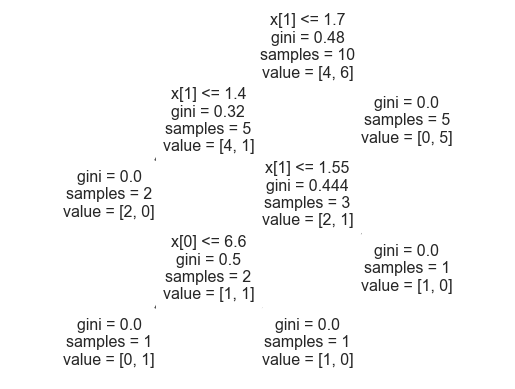

0.8


C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


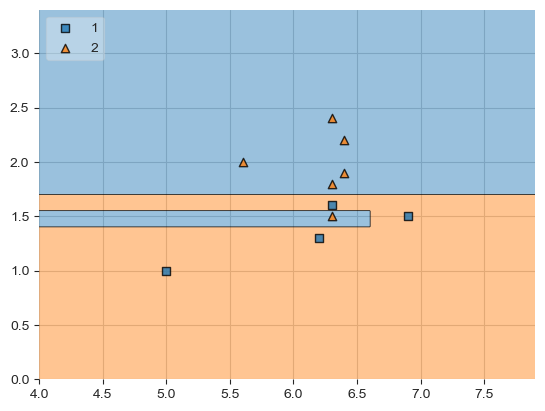

In [124]:
X_train1 = df_train.iloc[:,:-1]
y_train1 = df_train.iloc[:,-1]

X_train1 = pd.DataFrame(X_train1).sample(2,replace=True,axis=1)

dt1 = DecisionTreeClassifier()
evaluate(dt1,X_train1,y_train1) 

#### 2nd Tree

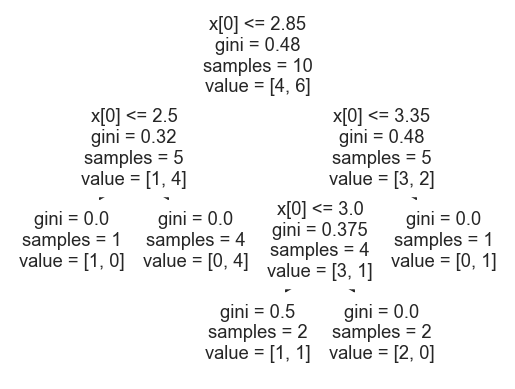

0.4


C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


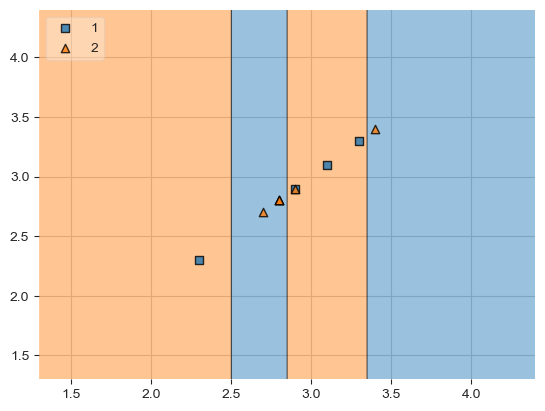

In [125]:
X_train2 = df_train.iloc[:,:-1]
y_train2 = df_train.iloc[:,-1]

X_train2 = pd.DataFrame(X_train2).sample(2,replace=True,axis=1)

dt2 = DecisionTreeClassifier()
evaluate(dt2,X_train2,y_train2)

#### 3rd Tree

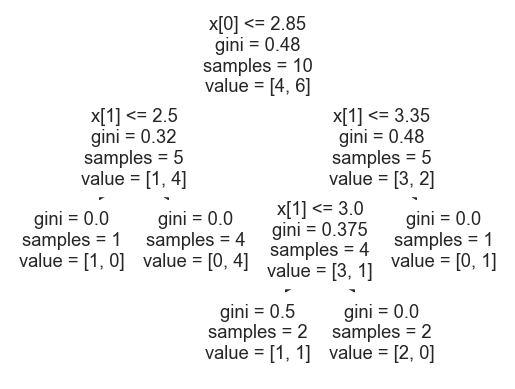

0.6


C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


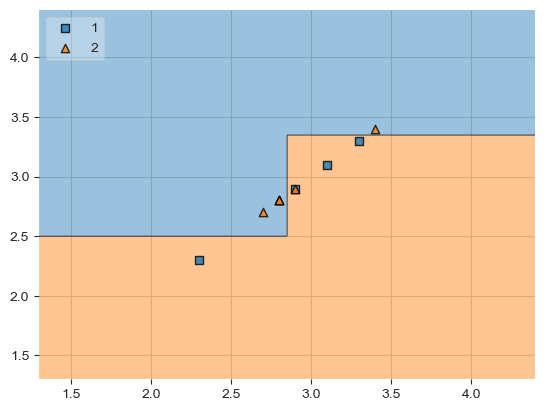

In [126]:
X_train3 = df_train.iloc[:,:-1]
y_train3 = df_train.iloc[:,-1]

X_train3 = pd.DataFrame(X_train3).sample(2,replace=True,axis=1)

dt3 = DecisionTreeClassifier()
evaluate(dt3,X_train3,y_train3)

## Individual model Prediction

In [127]:
voting_testing.sample(2,axis=1)

,Species,PetalWidthCm
137,2,1.8
117,2,2.2
72,1,1.5
144,2,2.5
115,2,2.3


In [128]:
print("Predictor 1",dt1.predict(np.array([3.3,5.7]).reshape(1,2)))
print("Predictor 2",dt2.predict(np.array([3.3,5.7]).reshape(1,2)))
print("Predictor 3",dt3.predict(np.array([3.3,5.7]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [1]
Predictor 3 [2]


C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
